In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib
with open("CnnTransformer/simclr/test_results_cnn_transformer2", 'r') as f:
    results = json.load(f)

In [2]:
patients = [int(x.split('_')[0]) for x in results.keys()]

In [3]:
sup_results = list()
log_results = list()
fine_results = list()
for value in results.values():
    sup_results.append(value['sup_res'][0]['test_acc'])
    log_results.append(value['logistic_res'][0]['test_acc'])
    fine_results.append(value['fully_tuned_res'][0]['test_acc'])

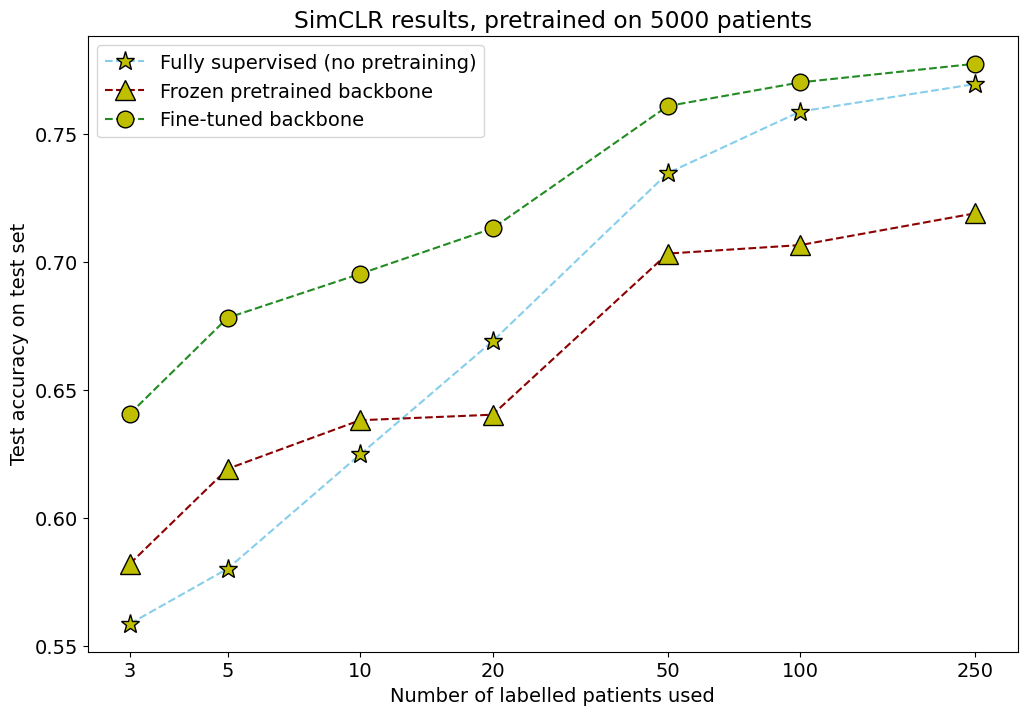

In [5]:

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
plt.plot(patients, sup_results, '--', color="skyblue", marker="*", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patients, log_results, '--', color="darkred", marker="^", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patients, fine_results, '--', color="forestgreen", marker="o", markeredgecolor="#000", markerfacecolor="y", markersize=12)
plt.xscale("log")
plt.xticks(patients, labels=patients)
plt.title("SimCLR results, pretrained on 5000 patients")
plt.xlabel("Number of labelled patients used")
plt.ylabel("Test accuracy on test set")
plt.minorticks_off()
plt.legend(["Fully supervised (no pretraining)", "Frozen pretrained backbone", "Fine-tuned backbone"])
plt.savefig('simclr_graph_testacc.png', facecolor="white")
plt.show()